# Import Data and Libraries



In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1_jslOM6OoNkMVN2Z6dMQuGUm1LN_8vFw'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1_jslOM6OoNkMVN2Z6dMQuGUm1LN_8vFw


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NADAC__National_Average_Drug_Acquisition_Cost_.csv')  
master_df = pd.read_csv('NADAC__National_Average_Drug_Acquisition_Cost_.csv')

#Data Exploration

In [0]:
master_df.shape

(6996156, 12)

In [0]:
master_df.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,IBUPROFEN 200 MG TABLET,70000017504,0.02991,11/21/2018,EA,C/I,Y,1,G,NaN,NaN,12/12/2018
1,OXYCODONE HCL ER 80 MG TABLET,115156201,9.02989,11/21/2018,EA,C/I,N,"1, 6",G,NaN,NaN,12/12/2018
2,OXYCODONE HCL 15 MG TABLET,603499128,0.15188,11/21/2018,EA,C/I,N,1,G,NaN,NaN,12/12/2018
3,KETOCONAZOLE 200 MG TABLET,51672402601,1.68457,11/21/2018,EA,C/I,N,1,G,NaN,NaN,12/12/2018
4,NICOTINE 7 MG/24HR PATCH,70000011302,1.72464,11/21/2018,EA,C/I,Y,"1, 6",G,NaN,NaN,12/12/2018


In [0]:
master_df.describe()

,NDC,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit
count,6.996156e+06,6.996156e+06,365256.000000
mean,3.361505e+10,9.562517e+00,3.911396
std,2.832572e+10,2.030984e+02,18.213795
min,2.143380e+06,1.100000e-04,0.002760
25%,5.742103e+08,7.611000e-02,0.125690
50%,4.347803e+10,2.552400e-01,0.368130
75%,6.131401e+10,1.262400e+00,2.380720
max,9.920709e+10,2.133128e+04,413.988000


In [0]:
# stelara = master_df[master_df['NDC Description'].str.contains('STELARA')]

In [0]:
# stelara.shape

In [0]:
# stelara.describe()

In [0]:
# stelara.sort_values('NADAC_Per_Unit', ascending=False).head(500)

### has Generic

In [0]:
has_generic = master_df[np.isfinite(master_df['Corresponding_Generic_Drug_NADAC_Per_Unit'])]

In [0]:
genlist = has_generic['NDC Description'].unique().tolist()


## Data Frame containing all drugs that would eventually get a generic



In [0]:
df = master_df[master_df['NDC Description'].isin(genlist)]
df.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
46,TUMS X-STR 750 TABLET CHEWABLE,135007407,0.05942,11/21/2018,EA,C/I,Y,"1, 6",B,0.02338,11/21/2018 12:00:00 AM,12/12/2018
58,RITALIN 20 MG TABLET,78044105,1.28094,05/23/2018,EA,C/I,N,2,B,0.32140,11/21/2018 12:00:00 AM,12/12/2018
81,DIOVAN 160 MG TABLET,78035934,7.60784,11/21/2018,EA,C/I,N,1,B,0.36963,11/21/2018 12:00:00 AM,12/12/2018
92,NICORETTE 2 MG CHEWING GUM,135015707,0.41473,11/21/2018,EA,C/I,Y,1,B,0.20534,11/21/2018 12:00:00 AM,12/12/2018
126,EXELON 4.6 MG/24HR PATCH,78050161,20.74839,10/17/2018,EA,C/I,N,2,B,5.06209,11/21/2018 12:00:00 AM,12/12/2018


In [0]:
df.rename(columns={'NADAC_Per_Unit': 'Brand NADAC Per Unit'
                           , 'Corresponding_Generic_Drug_NADAC_Per_Unit': 'Generic NADAC Per Unit', }, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
has_generic.describe()

,NDC,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit
count,3.652560e+05,365256.000000,365256.000000
mean,1.762175e+10,11.766529,3.911396
std,2.663705e+10,31.909060,18.213795
min,2.197590e+06,0.003090,0.002760
25%,6.915404e+07,0.953420,0.125690
50%,1.350510e+08,5.013080,0.368130
75%,5.045802e+10,10.624190,2.380720
max,9.920705e+10,464.297600,413.988000


In [0]:
df['name/gen'] = df['Brand NADAC Per Unit'] / df['Generic NADAC Per Unit']
df['name_gen_dif'] = df['Brand NADAC Per Unit'] - df['Generic NADAC Per Unit']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df['As of Date'] = pd.to_datetime(df['As of Date'], infer_datetime_format=True)
df['Effective_Date'] = pd.to_datetime(df['Effective_Date'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df.describe()

,NDC,Brand NADAC Per Unit,Generic NADAC Per Unit,name/gen,name_gen_dif
count,4.855690e+05,485569.000000,365256.000000,365256.000000,365256.000000
mean,2.043736e+10,12.642474,3.911396,26.529306,7.855133
std,2.794793e+10,34.057117,18.213795,72.434951,19.380977
min,2.197590e+06,0.003090,0.002760,0.171228,-115.105000
25%,6.958206e+07,0.869100,0.125690,1.751956,0.420600
50%,1.861092e+08,5.377170,0.368130,3.205200,2.967840
75%,5.128501e+10,10.942850,2.380720,19.293254,7.727110
max,9.920705e+10,634.659550,413.988000,1396.906529,319.366530


In [0]:
df.sort_values('name/gen').head(5000)

,NDC Description,NDC,Brand NADAC Per Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Generic NADAC Per Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,name/gen,name_gen_dif
5129909,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,1,B,0.61608,06/21/2017 12:00:00 AM,2017-06-28,0.171228,-0.51059
5285115,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,2,B,0.61608,06/21/2017 12:00:00 AM,2017-08-16,0.171228,-0.51059
5150339,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,1,B,0.61608,06/21/2017 12:00:00 AM,2017-07-05,0.171228,-0.51059
5161933,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,1,B,0.61608,06/21/2017 12:00:00 AM,2017-07-12,0.171228,-0.51059
5182002,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,2,B,0.61608,06/21/2017 12:00:00 AM,2017-07-19,0.171228,-0.51059
5081835,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,1,B,0.61608,06/21/2017 12:00:00 AM,2017-06-21,0.171228,-0.51059
5247036,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,2,B,0.61608,06/21/2017 12:00:00 AM,2017-08-02,0.171228,-0.51059
5258495,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,2,B,0.61608,06/21/2017 12:00:00 AM,2017-08-09,0.171228,-0.51059
5207379,FLEET PEDIA-LAX SUPPOSITORIES,132008112,0.10549,2017-06-21,EA,C/I,Y,2,B,0.61608,06/21/2017 12:00:00 AM,2017-07-26,0.171228,-0.51059
6278494,FLEET GLYCERIN 2 GM ADULT SUPP,132007924,0.07495,2018-05-23,EA,C/I,Y,1,B,0.42260,10/18/2017 12:00:00 AM,2018-05-23,0.177354,-0.34765


,NDC Description,NDC,Brand NADAC Per Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Generic NADAC Per Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,name/gen,name_gen_dif
46,TUMS X-STR 750 TABLET CHEWABLE,135007407,0.05942,2018-11-21,EA,C/I,Y,"1, 6",B,0.02338,11/21/2018 12:00:00 AM,2018-12-12,2.541488,0.03604
58,RITALIN 20 MG TABLET,78044105,1.28094,2018-05-23,EA,C/I,N,2,B,0.32140,11/21/2018 12:00:00 AM,2018-12-12,3.985501,0.95954
81,DIOVAN 160 MG TABLET,78035934,7.60784,2018-11-21,EA,C/I,N,1,B,0.36963,11/21/2018 12:00:00 AM,2018-12-12,20.582312,7.23821
92,NICORETTE 2 MG CHEWING GUM,135015707,0.41473,2018-11-21,EA,C/I,Y,1,B,0.20534,11/21/2018 12:00:00 AM,2018-12-12,2.019723,0.20939
126,EXELON 4.6 MG/24HR PATCH,78050161,20.74839,2018-10-17,EA,C/I,N,2,B,5.06209,11/21/2018 12:00:00 AM,2018-12-12,4.098779,15.68630
147,ADDERALL 10 MG TABLET,57844011001,6.18040,2018-06-30,EA,C/I,N,"4, 6",B-ANDA,0.48817,11/21/2018 12:00:00 AM,2018-12-12,12.660344,5.69223
168,SUBOXONE 4 MG-1 MG SL FILM,12496120403,7.80100,2018-10-17,EA,C/I,N,"2, 5",B,NaN,NaN,2018-12-12,NaN,NaN
171,RITALIN LA 40 MG CAPSULE,78037205,10.29140,2018-01-03,EA,C/I,N,4,B,3.44731,11/21/2018 12:00:00 AM,2018-12-12,2.985342,6.84409
185,TUMS TABLET CHEWABLE,135007048,0.03248,2018-11-21,EA,C/I,Y,"1, 6",B,0.01342,11/21/2018 12:00:00 AM,2018-12-12,2.420268,0.01906
199,NICORETTE 2 MG CHEWING GUM,135024102,0.41473,2018-11-21,EA,C/I,Y,1,B,0.20534,11/21/2018 12:00:00 AM,2018-12-12,2.019723,0.20939


#Visualizations

###Ativan

In [0]:
# epipen = master_df[master_df['NDC Description'].str.contains('EPIPEN')]
ativan = df[df['NDC Description'].str.contains('ATIVAN')]
ativan_1mg = df[df['NDC'] == 187006410]

In [0]:
ativan_1mg.describe()

,NDC,Brand NADAC Per Unit,Generic NADAC Per Unit,name/gen,name_gen_dif
count,250.0,250.000000,250.000000,250.000000,250.000000
mean,187006410.0,24.041442,0.025672,960.407730,24.015770
std,0.0,6.234254,0.004619,287.138296,6.233824
min,187006410.0,8.785940,0.021040,337.017912,8.761500
25%,187006410.0,22.160160,0.022820,772.023237,22.135080
50%,187006410.0,25.484190,0.024290,1036.079470,25.460350
75%,187006410.0,27.284530,0.025880,1162.527908,27.262560
max,187006410.0,31.818480,0.041720,1396.906529,31.780030


In [0]:
ativan.sort_values('As of Date', ascending=False)

,NDC Description,NDC,Brand NADAC Per Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Generic NADAC Per Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,name/gen,name_gen_dif
690353,ATIVAN 1 MG TABLET,187006410,31.81848,2019-05-22,EA,C/I,N,4,B,0.03845,06/19/2019 12:00:00 AM,2019-06-19,827.528739,31.78003
674318,ATIVAN 1 MG TABLET,187006401,31.81848,2019-05-22,EA,C/I,N,4,B,0.03845,06/19/2019 12:00:00 AM,2019-06-19,827.528739,31.78003
654212,ATIVAN 1 MG TABLET,187006401,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-06-12,762.667306,31.77676
657389,ATIVAN 1 MG TABLET,187006410,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-06-12,762.667306,31.77676
623340,ATIVAN 1 MG TABLET,187006401,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-06-05,762.667306,31.77676
622506,ATIVAN 1 MG TABLET,187006410,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-06-05,762.667306,31.77676
613813,ATIVAN 1 MG TABLET,187006410,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-05-29,762.667306,31.77676
603751,ATIVAN 1 MG TABLET,187006401,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-05-29,762.667306,31.77676
585228,ATIVAN 1 MG TABLET,187006401,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-05-22,762.667306,31.77676
584516,ATIVAN 1 MG TABLET,187006410,31.81848,2019-05-22,EA,C/I,N,1,B,0.04172,05/22/2019 12:00:00 AM,2019-05-22,762.667306,31.77676


In [0]:
ativan.sort_values('As of Date')

,NDC Description,NDC,Brand NADAC Per Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Generic NADAC Per Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,name/gen,name_gen_dif
1649381,ATIVAN 1 MG TABLET,64455006401,5.84274,2013-08-30,EA,C/I,N,2,B,0.02542,11/21/2013 12:00:00 AM,2013-11-28,229.848151,5.81732
3257272,ATIVAN 2 MG TABLET,64455006501,9.27230,2013-08-30,EA,C/I,N,4,B,0.04793,11/21/2013 12:00:00 AM,2013-11-28,193.455039,9.22437
3535648,ATIVAN 1 MG TABLET,64455006410,5.84274,2013-08-30,EA,C/I,N,2,B,0.02542,11/21/2013 12:00:00 AM,2013-11-28,229.848151,5.81732
3330743,ATIVAN 0.5 MG TABLET,64455006301,4.35697,2013-08-30,EA,C/I,N,4,B,0.02235,11/21/2013 12:00:00 AM,2013-11-28,194.942729,4.33462
2019850,ATIVAN 1 MG TABLET,64455006401,5.84274,2013-08-30,EA,C/I,N,2,B,0.02542,11/21/2013 12:00:00 AM,2013-12-05,229.848151,5.81732
3742521,ATIVAN 2 MG TABLET,64455006501,9.27230,2013-08-30,EA,C/I,N,4,B,0.04793,11/21/2013 12:00:00 AM,2013-12-05,193.455039,9.22437
1710715,ATIVAN 1 MG TABLET,64455006410,5.84274,2013-08-30,EA,C/I,N,2,B,0.02542,11/21/2013 12:00:00 AM,2013-12-05,229.848151,5.81732
3267945,ATIVAN 0.5 MG TABLET,64455006301,4.35697,2013-08-30,EA,C/I,N,4,B,0.02235,11/21/2013 12:00:00 AM,2013-12-05,194.942729,4.33462
3615666,ATIVAN 1 MG TABLET,64455006410,6.78862,2013-12-03,EA,C/I,N,3,B,0.02542,11/21/2013 12:00:00 AM,2013-12-11,267.058222,6.76320
2426563,ATIVAN 0.5 MG TABLET,64455006301,5.06236,2013-12-03,EA,C/I,N,3,B,0.02235,11/21/2013 12:00:00 AM,2013-12-11,226.503803,5.04001


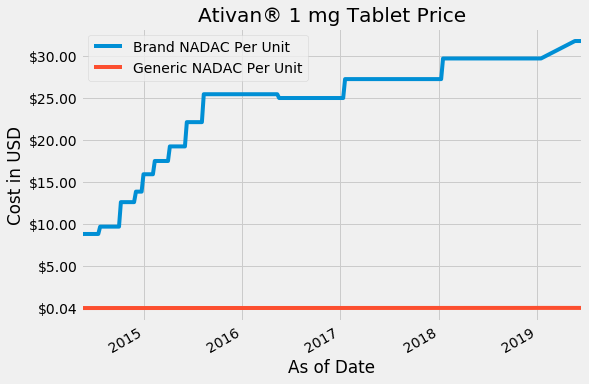

In [0]:
plt.style.use('fivethirtyeight')
ax = ativan_1mg.plot(x='As of Date'
                , y=['Brand NADAC Per Unit', 'Generic NADAC Per Unit']
                , yticks=(.04, 5, 10, 15, 20, 25, 30)
                , figsize=(8,6))
plt.title('Ativan® 1 mg Tablet Price')
plt.ylabel('Cost in USD')
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


In [0]:
ativan_1mg.describe()

,NDC,Brand NADAC Per Unit,Generic NADAC Per Unit,name/gen,name_gen_dif
count,250.0,250.000000,250.000000,250.000000,250.000000
mean,187006410.0,24.041442,0.025672,960.407730,24.015770
std,0.0,6.234254,0.004619,287.138296,6.233824
min,187006410.0,8.785940,0.021040,337.017912,8.761500
25%,187006410.0,22.160160,0.022820,772.023237,22.135080
50%,187006410.0,25.484190,0.024290,1036.079470,25.460350
75%,187006410.0,27.284530,0.025880,1162.527908,27.262560
max,187006410.0,31.818480,0.041720,1396.906529,31.780030


###EPIPEN

In [0]:
epipen = df[df['NDC Description'].str.contains('EPIPEN')]
# epipen.sort_values('As of Date', ascending=False)

In [0]:
epipen.head(1)

,NDC Description,NDC,Brand NADAC Per Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Generic NADAC Per Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,name/gen,name_gen_dif
2442,EPIPEN 2-PAK 0.3 MG AUTO-INJCT,49502050002,292.22758,2018-06-20,EA,C/I,N,2,B,143.52572,11/21/2018 12:00:00 AM,2018-12-12,2.036064,148.70186


In [0]:
# plt.style.use('fivethirtyeight')
# ax = epipen.plot(x='As of Date'
#                 , y=['Brand NADAC Per Unit', 'Generic NADAC Per Unit']
#                 , ylim=[100, 350]
#                 , figsize=(8,6))
# plt.legend(loc='upper left')
# plt.title('Ativan® 1 mg Tablet Price')
# plt.ylabel('Cost in USD')
# formatter = ticker.FormatStrFormatter('$%1.2f')
# ax.yaxis.set_major_formatter(formatter)

In [0]:
epipen['NDC Description'].value_counts()

EPIPEN JR 2-PAK 0.15 MG INJCTR    290
EPIPEN 2-PAK 0.3 MG AUTO-INJCT    288
EPIPEN JR 0.15 MG AUTO-INJECTR     95
EPIPEN 0.3 MG AUTO-INJECTOR        95
Name: NDC Description, dtype: int64

In [0]:
df2 = epipen[epipen['NDC Description'] == 'EPIPEN JR 2-PAK 0.15 MG INJCTR']

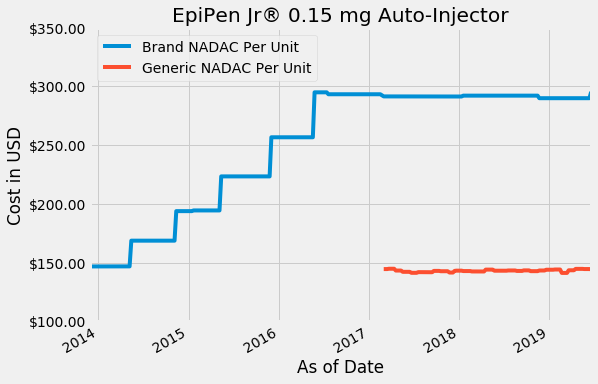

In [0]:
plt.style.use('fivethirtyeight')
ax = df2.plot(x='As of Date'
                , y=['Brand NADAC Per Unit', 'Generic NADAC Per Unit']
                , ylim=[100, 350]
                , figsize=(8,6))
plt.legend(loc='upper left')
plt.title('EpiPen Jr® 0.15 mg Auto-Injector')
plt.ylabel('Cost in USD')
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

In [0]:
# epipens = df2[['NDC Description', 'Brand NADAC Per Unit', 'Generic NADAC Per Unit']]
# epipens.head()

In [0]:
# ax = epipens.iloc[[0,3]].plot.bar(figsize=(8,6))
# ax.set_xticklabels(epipens['NDC Description'])
# plt.title('Ativan® 1 mg Tablet Price')
# plt.xlabel(('EpiPen®', 'EpiPen Jr®'))
# plt.ylabel('Cost in USD')
# formatter = ticker.FormatStrFormatter('$%1.2f')
# ax.yaxis.set_major_formatter(formatter)
